# Topic 1: Bayesian Inference - Applications and Exercises

This notebook covers:
- Applications of Bayes' Theorem
- Practical exercises with detailed solutions
- Comparison of Bayesian and Frequentist approaches

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas as pd
import seaborn as sns

plt.style.use('seaborn-v0_8')
np.random.seed(42)

## 1. Applications of Bayes' Theorem

### 1.1 Medical Diagnosis
Updating probabilities of diseases after observing test results.

In [2]:
def medical_diagnosis_example():
    """
    Example: Rare disease diagnosis
    """
    # Disease prevalence
    P_disease = 0.01  # 1% of population has disease
    
    # Test characteristics
    sensitivity = 0.95  # P(positive | disease)
    specificity = 0.90  # P(negative | no disease)
    
    # Calculate P(positive | no disease)
    P_pos_given_no_disease = 1 - specificity
    
    # Calculate P(positive) using law of total probability
    P_positive = (sensitivity * P_disease + 
                  P_pos_given_no_disease * (1 - P_disease))
    
    # Apply Bayes' theorem: P(disease | positive)
    P_disease_given_positive = (sensitivity * P_disease) / P_positive
    
    print("Medical Diagnosis Example")
    print("=" * 50)
    print(f"Disease prevalence: {P_disease:.1%}")
    print(f"Test sensitivity: {sensitivity:.1%}")
    print(f"Test specificity: {specificity:.1%}")
    print(f"\nP(positive test): {P_positive:.3f}")
    print(f"P(disease | positive test): {P_disease_given_positive:.3f}")
    print(f"\nInterpretation: Only {P_disease_given_positive:.1%} of positive tests")
    print(f"actually indicate disease due to low prevalence!")
    
    return P_disease_given_positive

medical_diagnosis_example()

Medical Diagnosis Example
Disease prevalence: 1.0%
Test sensitivity: 95.0%
Test specificity: 90.0%

P(positive test): 0.108
P(disease | positive test): 0.088

Interpretation: Only 8.8% of positive tests
actually indicate disease due to low prevalence!


0.08755760368663597

### 1.2 Spam Filtering
Email services use Bayesian methods to filter spam based on word frequencies.

In [3]:
def spam_filter_example():
    """
    Simplified spam filter using Naive Bayes
    """
    # Prior probabilities
    P_spam = 0.3  # 30% of emails are spam
    P_ham = 0.7   # 70% are legitimate
    
    # Word: "free"
    P_free_given_spam = 0.6  # 60% of spam contains "free"
    P_free_given_ham = 0.05  # 5% of ham contains "free"
    
    # P("free")
    P_free = P_free_given_spam * P_spam + P_free_given_ham * P_ham
    
    # P(spam | "free")
    P_spam_given_free = (P_free_given_spam * P_spam) / P_free
    
    print("Spam Filter Example")
    print("=" * 50)
    print(f"Prior P(spam): {P_spam:.1%}")
    print(f"P('free' | spam): {P_free_given_spam:.1%}")
    print(f"P('free' | ham): {P_free_given_ham:.1%}")
    print(f"\nP(spam | 'free'): {P_spam_given_free:.1%}")
    print(f"\nConclusion: Email with 'free' is {P_spam_given_free:.1%} likely spam")
    
    return P_spam_given_free

spam_filter_example()

Spam Filter Example
Prior P(spam): 30.0%
P('free' | spam): 60.0%
P('free' | ham): 5.0%

P(spam | 'free'): 83.7%

Conclusion: Email with 'free' is 83.7% likely spam


0.8372093023255813

## 2. Practical Exercise - Question 2.1

**Problem**: In a clinical study, 5% of the population carries a virus. A test has:
- Sensitivity: 92% (positive if virus present)
- False positive rate: 8% (positive if no virus)

Calculate:
(i) P(virus | positive test)
(ii) P(positive test)

Question 2.1: Virus Testing

Given:
  P(virus) = 0.05
  P(positive | virus) = 0.92
  P(positive | no virus) = 0.08

(ii) P(positive test):
     P(+) = P(+|V)·P(V) + P(+|¬V)·P(¬V)
     P(+) = 0.92×0.05 + 0.08×0.95
     P(+) = 0.0460 + 0.0760
     P(+) = 0.1220

(i) P(virus | positive test):
    P(V|+) = P(+|V)·P(V) / P(+)
    P(V|+) = (0.92×0.05) / 0.1220
    P(V|+) = 0.3770

    Answer: 37.7%


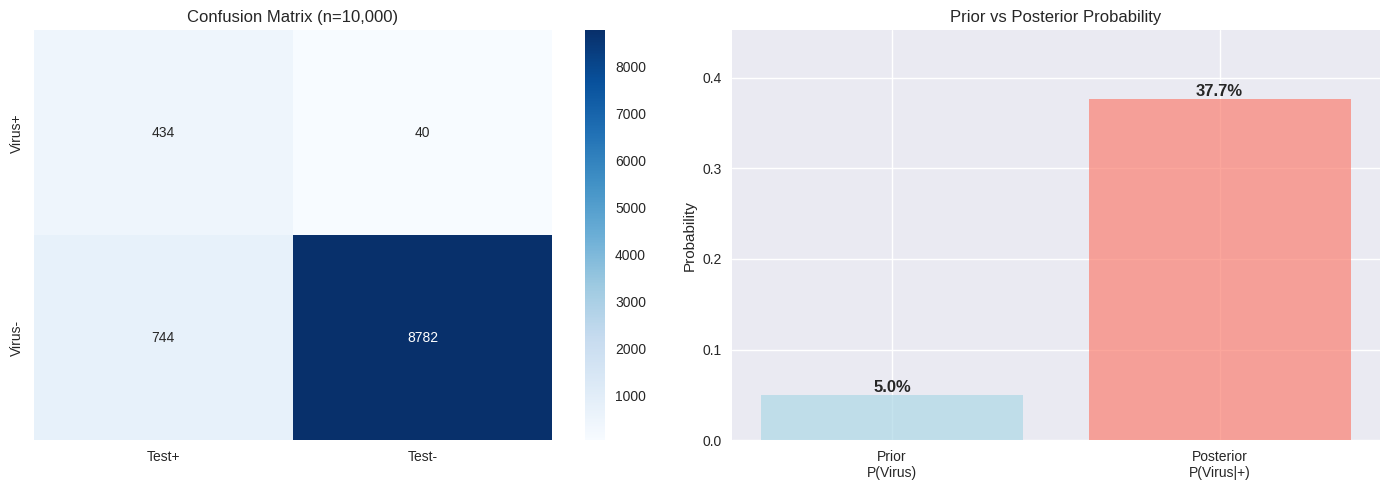


Key Insight: Positive test increases probability from 5.0% to 37.7%


In [4]:
# Question 2.1 Solution

# Given information
P_virus = 0.05  # 5% prevalence
P_no_virus = 1 - P_virus

# Test characteristics
sensitivity = 0.92  # P(positive | virus)
false_positive_rate = 0.08  # P(positive | no virus)

print("Question 2.1: Virus Testing")
print("=" * 60)
print("\nGiven:")
print(f"  P(virus) = {P_virus:.2f}")
print(f"  P(positive | virus) = {sensitivity:.2f}")
print(f"  P(positive | no virus) = {false_positive_rate:.2f}")

# (ii) Calculate P(positive test) using law of total probability
P_positive = (sensitivity * P_virus + 
              false_positive_rate * P_no_virus)

print(f"\n(ii) P(positive test):")
print(f"     P(+) = P(+|V)·P(V) + P(+|¬V)·P(¬V)")
print(f"     P(+) = {sensitivity}×{P_virus} + {false_positive_rate}×{P_no_virus}")
print(f"     P(+) = {sensitivity * P_virus:.4f} + {false_positive_rate * P_no_virus:.4f}")
print(f"     P(+) = {P_positive:.4f}")

# (i) Calculate P(virus | positive) using Bayes' theorem
P_virus_given_positive = (sensitivity * P_virus) / P_positive

print(f"\n(i) P(virus | positive test):")
print(f"    P(V|+) = P(+|V)·P(V) / P(+)")
print(f"    P(V|+) = ({sensitivity}×{P_virus}) / {P_positive:.4f}")
print(f"    P(V|+) = {P_virus_given_positive:.4f}")
print(f"\n    Answer: {P_virus_given_positive:.1%}")

# Visualization
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Tree diagram simulation
n_people = 10000
has_virus = np.random.binomial(1, P_virus, n_people)
test_results = np.where(has_virus,
                       np.random.binomial(1, sensitivity, n_people),
                       np.random.binomial(1, false_positive_rate, n_people))

# Confusion matrix
tp = np.sum((has_virus == 1) & (test_results == 1))
fp = np.sum((has_virus == 0) & (test_results == 1))
tn = np.sum((has_virus == 0) & (test_results == 0))
fn = np.sum((has_virus == 1) & (test_results == 0))

confusion = np.array([[tp, fn], [fp, tn]])
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', ax=axes[0],
           xticklabels=['Test+', 'Test-'],
           yticklabels=['Virus+', 'Virus-'])
axes[0].set_title('Confusion Matrix (n=10,000)')

# Bar chart comparison
categories = ['Prior\nP(Virus)', 'Posterior\nP(Virus|+)']
probabilities = [P_virus, P_virus_given_positive]
colors = ['lightblue', 'salmon']

bars = axes[1].bar(categories, probabilities, color=colors, alpha=0.7)
axes[1].set_ylabel('Probability')
axes[1].set_title('Prior vs Posterior Probability')
axes[1].set_ylim(0, max(probabilities) * 1.2)

for bar, prob in zip(bars, probabilities):
    height = bar.get_height()
    axes[1].text(bar.get_x() + bar.get_width()/2., height,
                f'{prob:.1%}', ha='center', va='bottom', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

print(f"\nKey Insight: Positive test increases probability from {P_virus:.1%} to {P_virus_given_positive:.1%}")

## 3. Practical Exercise - Question 2.2

**Problem**: Population study with 10,000 individuals:
- Disease positive (D+): 500
- Disease negative (D-): 9,500
- True Positive (TP): 450
- False Negative (FN): 50
- True Negative (TN): 8,550
- False Positive (FP): 950

Calculate:
(a) P(test negative)
(b) P(disease | test negative)

Question 2.2: Disease Testing Study

Given Data:
  Total population: 10,000
  Disease positive: 500
  Disease negative: 9500

  True Positive (TP): 450
  False Negative (FN): 50
  True Negative (TN): 8550
  False Positive (FP): 950

Verification:
  Test positive: 1400 (TP + FP)
  Test negative: 8600 (TN + FN)
  Total: 10000

(a) P(test negative):
    P(¬T) = (TN + FN) / N
    P(¬T) = (8550 + 50) / 10000
    P(¬T) = 8600 / 10000
    P(¬T) = 0.8600

    Answer: 86.0%

(b) P(disease | test negative):
    P(D|¬T) = FN / (TN + FN)
    P(D|¬T) = 50 / 8600
    P(D|¬T) = 0.005814

    Answer: 0.5814%

Additional Test Metrics:
  Sensitivity: 90.0%
  Specificity: 90.0%
  Positive Predictive Value (PPV): 32.1%
  Negative Predictive Value (NPV): 99.4%


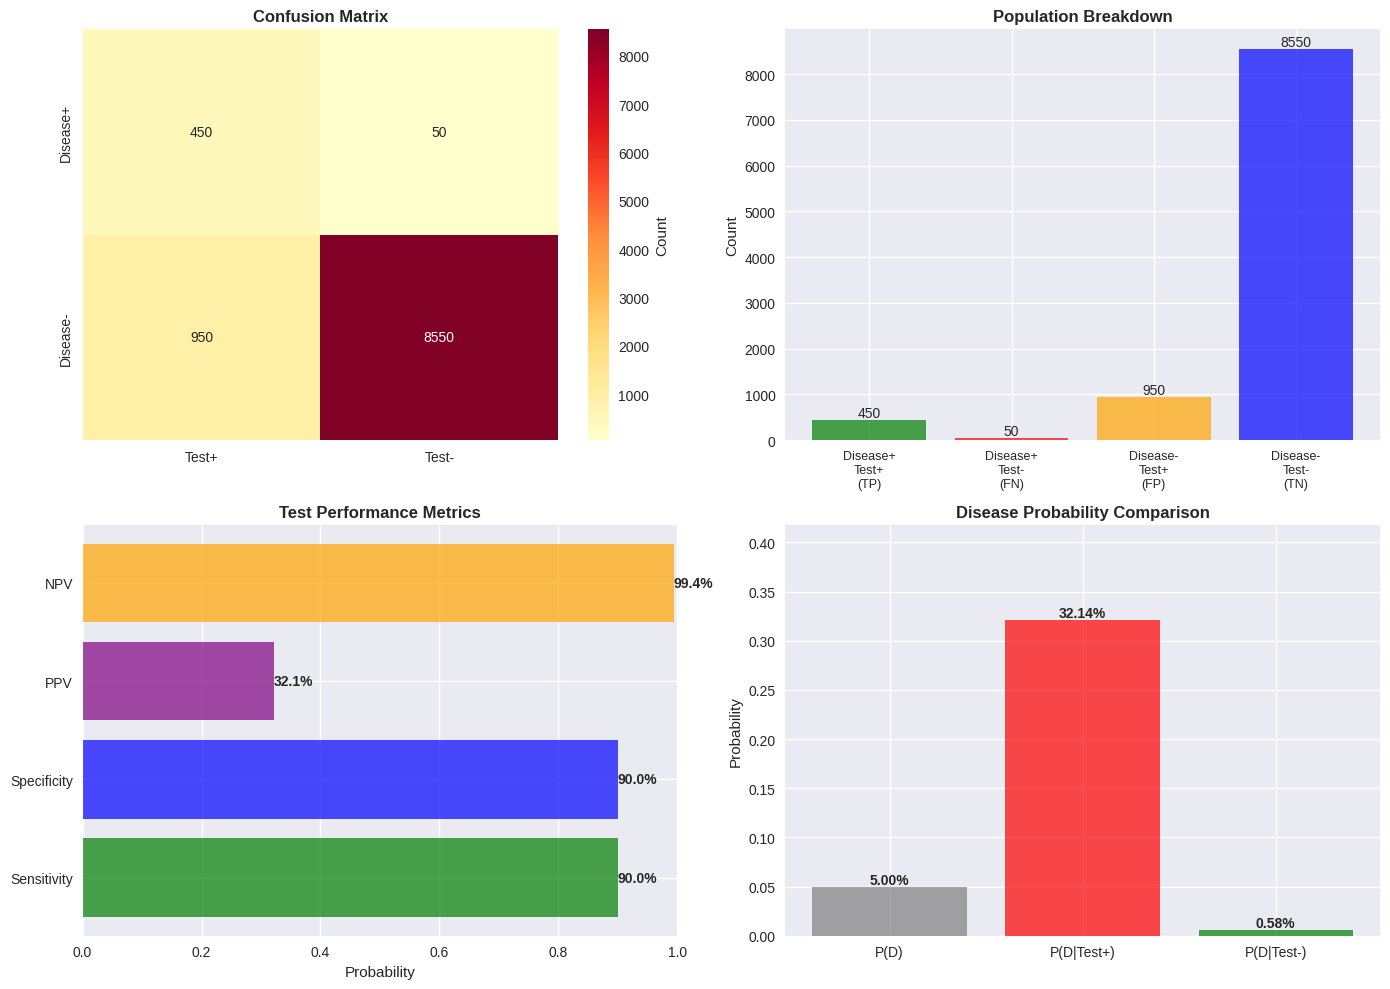


Key Insight: Negative test reduces disease probability from 5.0% to 0.58%
This test has excellent NPV (99.4%), making it good for ruling out disease.


In [5]:
# Question 2.2 Solution

# Given data
N = 10000
D_pos = 500
D_neg = 9500

TP = 450  # True Positive
FN = 50   # False Negative
TN = 8550 # True Negative
FP = 950  # False Positive

print("Question 2.2: Disease Testing Study")
print("=" * 60)
print("\nGiven Data:")
print(f"  Total population: {N:,}")
print(f"  Disease positive: {D_pos}")
print(f"  Disease negative: {D_neg}")
print(f"\n  True Positive (TP): {TP}")
print(f"  False Negative (FN): {FN}")
print(f"  True Negative (TN): {TN}")
print(f"  False Positive (FP): {FP}")

# Verify totals
test_positive = TP + FP
test_negative = TN + FN

print(f"\nVerification:")
print(f"  Test positive: {test_positive} (TP + FP)")
print(f"  Test negative: {test_negative} (TN + FN)")
print(f"  Total: {test_positive + test_negative}")

# (a) P(test negative) = P(¬T)
P_test_negative = test_negative / N

print(f"\n(a) P(test negative):")
print(f"    P(¬T) = (TN + FN) / N")
print(f"    P(¬T) = ({TN} + {FN}) / {N}")
print(f"    P(¬T) = {test_negative} / {N}")
print(f"    P(¬T) = {P_test_negative:.4f}")
print(f"\n    Answer: {P_test_negative:.1%}")

# (b) P(disease | test negative) = P(D | ¬T)
P_disease_given_neg = FN / test_negative

print(f"\n(b) P(disease | test negative):")
print(f"    P(D|¬T) = FN / (TN + FN)")
print(f"    P(D|¬T) = {FN} / {test_negative}")
print(f"    P(D|¬T) = {P_disease_given_neg:.6f}")
print(f"\n    Answer: {P_disease_given_neg:.4%}")

# Additional metrics
sensitivity = TP / D_pos
specificity = TN / D_neg
PPV = TP / test_positive  # Positive Predictive Value
NPV = TN / test_negative  # Negative Predictive Value

print(f"\nAdditional Test Metrics:")
print(f"  Sensitivity: {sensitivity:.1%}")
print(f"  Specificity: {specificity:.1%}")
print(f"  Positive Predictive Value (PPV): {PPV:.1%}")
print(f"  Negative Predictive Value (NPV): {NPV:.1%}")

# Visualization
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Confusion matrix
confusion = np.array([[TP, FN], [FP, TN]])
sns.heatmap(confusion, annot=True, fmt='d', cmap='YlOrRd', ax=axes[0,0],
           xticklabels=['Test+', 'Test-'],
           yticklabels=['Disease+', 'Disease-'],
           cbar_kws={'label': 'Count'})
axes[0,0].set_title('Confusion Matrix', fontsize=12, fontweight='bold')

# Population breakdown
categories = ['Disease+\nTest+\n(TP)', 'Disease+\nTest-\n(FN)', 
              'Disease-\nTest+\n(FP)', 'Disease-\nTest-\n(TN)']
values = [TP, FN, FP, TN]
colors_bar = ['green', 'red', 'orange', 'blue']

bars = axes[0,1].bar(range(4), values, color=colors_bar, alpha=0.7)
axes[0,1].set_xticks(range(4))
axes[0,1].set_xticklabels(categories, fontsize=9)
axes[0,1].set_ylabel('Count')
axes[0,1].set_title('Population Breakdown', fontsize=12, fontweight='bold')

for bar, val in zip(bars, values):
    height = bar.get_height()
    axes[0,1].text(bar.get_x() + bar.get_width()/2., height,
                  f'{val}', ha='center', va='bottom', fontsize=10)

# Test metrics
metrics = ['Sensitivity', 'Specificity', 'PPV', 'NPV']
metric_values = [sensitivity, specificity, PPV, NPV]
colors_metrics = ['green', 'blue', 'purple', 'orange']

bars = axes[1,0].barh(metrics, metric_values, color=colors_metrics, alpha=0.7)
axes[1,0].set_xlabel('Probability')
axes[1,0].set_title('Test Performance Metrics', fontsize=12, fontweight='bold')
axes[1,0].set_xlim(0, 1)

for bar, val in zip(bars, metric_values):
    width = bar.get_width()
    axes[1,0].text(width, bar.get_y() + bar.get_height()/2.,
                  f'{val:.1%}', ha='left', va='center', fontsize=10, fontweight='bold')

# Probability comparison
prob_labels = ['P(D)', 'P(D|Test+)', 'P(D|Test-)']
prob_values = [D_pos/N, PPV, P_disease_given_neg]
colors_prob = ['gray', 'red', 'green']

bars = axes[1,1].bar(prob_labels, prob_values, color=colors_prob, alpha=0.7)
axes[1,1].set_ylabel('Probability')
axes[1,1].set_title('Disease Probability Comparison', fontsize=12, fontweight='bold')
axes[1,1].set_ylim(0, max(prob_values) * 1.3)

for bar, val in zip(bars, prob_values):
    height = bar.get_height()
    axes[1,1].text(bar.get_x() + bar.get_width()/2., height,
                  f'{val:.2%}', ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

print(f"\nKey Insight: Negative test reduces disease probability from {D_pos/N:.1%} to {P_disease_given_neg:.2%}")
print(f"This test has excellent NPV ({NPV:.1%}), making it good for ruling out disease.")